<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#00b3e5;">Supervised Learning Project

<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#00b3e5;"> Part One(Domain) : Health Care

# Context : 
    
  Medical research university X is undergoing a deep research on patients with certain conditions. 
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by 
the client by providing different datasets to the AI team for developing a AIML model which can predict the 
condition of the patient depending on the received test results. 
    
• DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current 
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and 
orientation of the condition to their body part.
1. P_incidence
2. P_tilt
3. L_angle 
4. S_slope
5. P_radius 
6. S_degree
7. Class

PROJECT OBJECTIVE: Demonstrate the ability to fetch, process and leverage data to generate useful predictions 
by training Supervised Learning algorithms.

In [88]:
# Importing Libreries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
from matplotlib import pyplot 

In [89]:
os.chdir('D:\AIML\GL_Projects\Supervised_Learning')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.Importing datasets
    
There are three datasets given

Part1 - Normal

Part1 - Type_H

Part1 - Type_S

In [211]:
# Dataset 1
df1 = pd.read_csv('Part1 - Normal.csv')
print(f"Shape of Normal Dataset 1 : {df1.shape}")
print(f"Size of Data1 : {df1.size}")
df1.head()

Shape of Normal Dataset 1 : (100, 7)
Size of Data1 : 700


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [216]:
# dataset 2
df2 = pd.read_csv('Part1 - Type_H.csv')
print(f"Shape of Type_H Dataset 2 : {df2.shape}")
print(f"Size of Data2 : {df2.size}")
df2.head()

Shape of Type_H Dataset 2 : (60, 7)
Size of Data2 : 420


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [215]:
# Dataset 3
df3 = pd.read_csv('Part1 - Type_S.csv')
print(f"Shape of Type_S Dataset 3 : {df3.shape}")
print(f"Size of Data3 : {df3.size}")
df3.head()

Shape of Type_S Dataset 3 : (150, 7)
Size of Data3 : 1050


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:Black">Combine three datasets

In [93]:
df = df1.append([df2,df3])
df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [214]:
# Final dataset 
df.shape
print(f"Size of Data : {df.size}")

Size of Data1 : 55000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 2.Data Cleansing

In [95]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:Black"> Here column "Class" is Object. We need to change the datatype of this column

In [96]:
df['Class'] = df['Class'].astype('category') # Change the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  310 non-null    float64 
 1   P_tilt       310 non-null    float64 
 2   L_angle      310 non-null    float64 
 3   S_slope      310 non-null    float64 
 4   P_radius     310 non-null    float64 
 5   S_Degree     310 non-null    float64 
 6   Class        310 non-null    category
dtypes: category(1), float64(6)
memory usage: 17.5 KB


In [97]:
# Checking unique values in the Target Column
df.Class.unique()

['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s']
Categories (6, object): ['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s']

In [98]:
df.Class.value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

**Here type_h and Type_H, Normal and Nrmal, Type_S and tp_s are same, might be typo mistake.**

**Now we need to move type_h-> Type_H, tp_s->Type_S and Nrmal->Normal**

In [99]:
df["Class"].replace({"type_h": "Type_H", "tp_s": "Type_S", "Nrmal": "Normal"}, inplace=True)

In [100]:
# Checking number of classes in column Class
df['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

**Now there are only three classes in the target column.**

In [101]:
# Check Missing Values
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:Black"> Observed no Missing Values.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 3.Data Analysis and Visualization

In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;">Mean and Median of all variables looks almost similar to each other except S_Degree variable.

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;">Whisker of S_Degree is too large and data distribution looks right skewed.

<span style="font-family: Arial; font-weight:bold;foMnt-size:1.0em;color:#00b3e5;">Other variables looks normally distributed and may be with very few outliers.
    
Lets confirm above statement with Univariate Analysis using histogram and box plot


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Univariate Analysis
    
On Each Variable

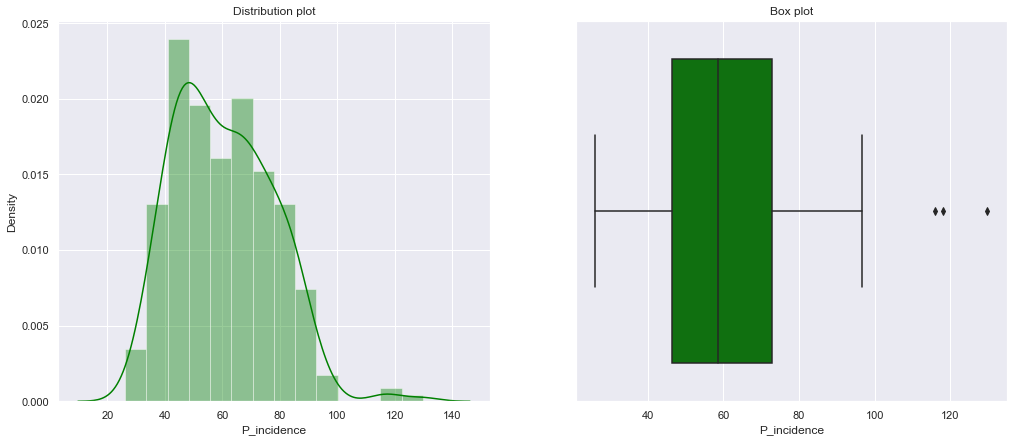

Total Number of Outliers in P_Incidence =  3.00


In [103]:
# P_Incidence
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_incidence', data=df,  orient='h' , ax=axes[1],color='Green').set_title('Box plot')
sns.distplot(df['P_incidence'],  ax=axes[0],color='Green').set_title('Distribution plot')
plt.show()
# Checking Number of outliers
q1, q3= np.percentile(df['P_incidence'],[25,75])
IQR = q3-q1
lower,upper = q1-1.5*IQR, q3+1.5*IQR
outliers = ((df['P_incidence'] < lower) | (df['P_incidence'] > upper)).sum()
print('Total Number of Outliers in P_Incidence =  %1.2f'%outliers)

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:Darkblue">P_Incidence Data is mostly normal distributed with little right skewed and having three outliers.Need to Impute outliers.

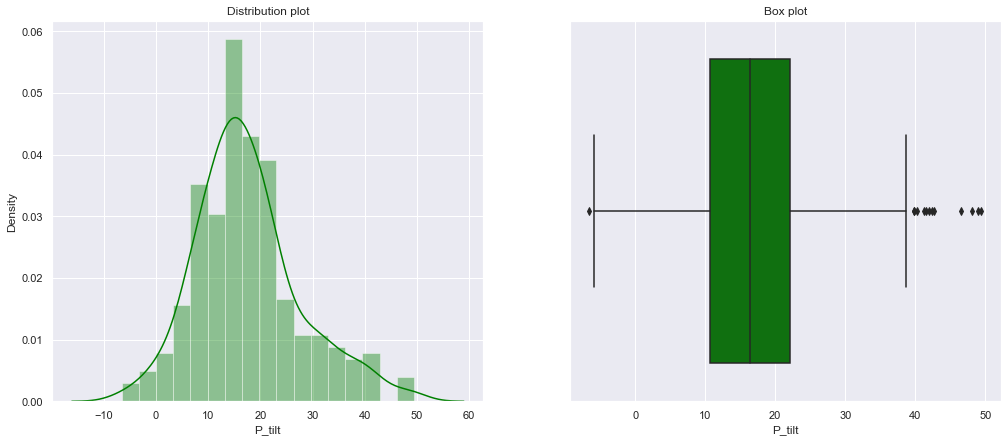

Total Number of Outliers in P_tilt =  13.00


In [104]:
# P_tilt
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_tilt', data=df,  orient='h' , ax=axes[1],color='Green').set_title('Box plot')
sns.distplot(df['P_tilt'],  ax=axes[0],color='Green').set_title('Distribution plot')
plt.show()
# Checking Number of outliers
q1, q3= np.percentile(df['P_tilt'],[25,75])
IQR = q3-q1
lower,upper = q1-1.5*IQR, q3+1.5*IQR
outliers = ((df['P_tilt'] < lower) | (df['P_tilt'] > upper)).sum()
print('Total Number of Outliers in P_tilt =  %1.2f'%outliers)

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:Darkblue"> P_tilt Data is normal distributed and having thirteen outliers.Need to Impute outliers.

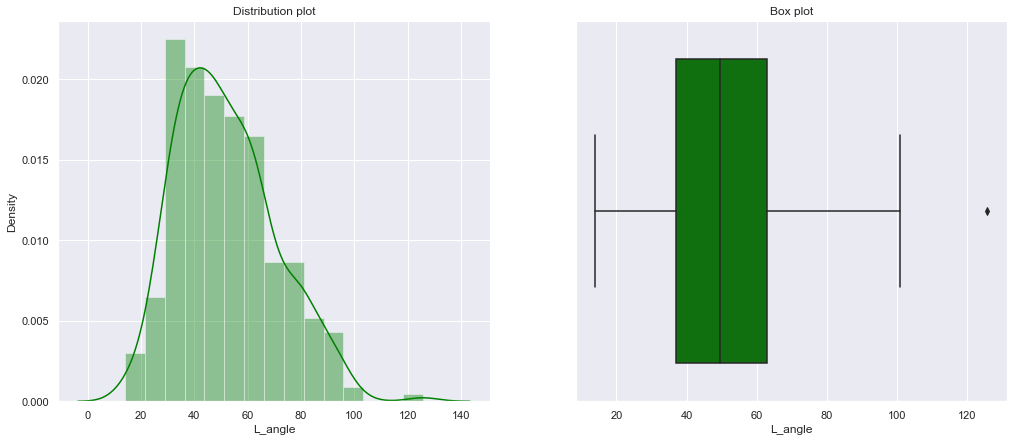

Total Number of Outliers in L_angle =  1.00


In [105]:
# L_angle
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'L_angle', data=df,  orient='h' , ax=axes[1],color='Green').set_title('Box plot')
sns.distplot(df['L_angle'],  ax=axes[0],color='Green').set_title('Distribution plot')
plt.show()
# Checking Number of outliers
q1, q3= np.percentile(df['L_angle'],[25,75])
IQR = q3-q1
lower,upper = q1-1.5*IQR, q3+1.5*IQR
outliers = ((df['L_angle'] < lower) | (df['L_angle'] > upper)).sum()
print('Total Number of Outliers in L_angle =  %1.2f'%outliers)

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:Darkblue"> L_angle Data is normal distributed with little right skewed and having one outlier.Need to Impute outlier.

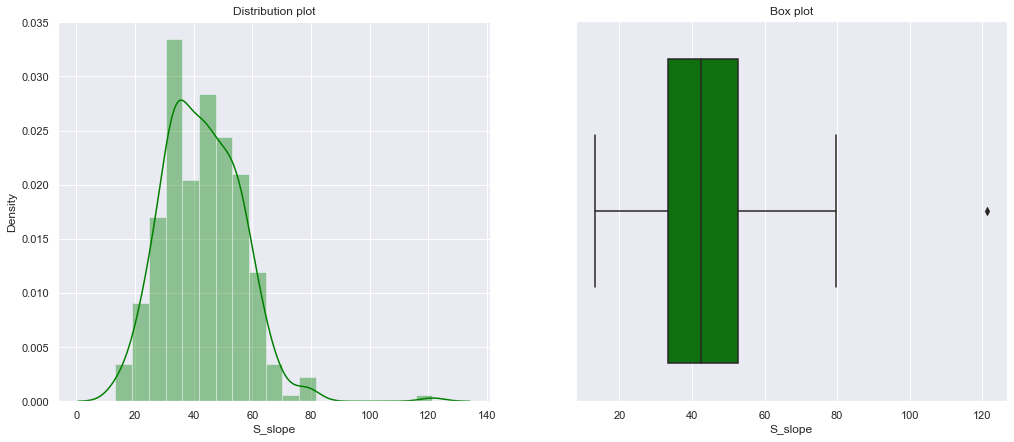

Total Number of Outliers in S_slope =  1.00


In [106]:
# S_slope
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'S_slope', data=df,  orient='h' , ax=axes[1],color='Green').set_title('Box plot')
sns.distplot(df['S_slope'],  ax=axes[0],color='Green').set_title('Distribution plot')
plt.show()
# Checking Number of outliers
q1, q3= np.percentile(df['S_slope'],[25,75])
IQR = q3-q1
lower,upper = q1-1.5*IQR, q3+1.5*IQR
outliers = ((df['S_slope'] < lower) | (df['S_slope'] > upper)).sum()
print('Total Number of Outliers in S_slope =  %1.2f'%outliers)

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:Darkblue"> S_slope Data is right skewed with one outlier.Need to Impute outlier.

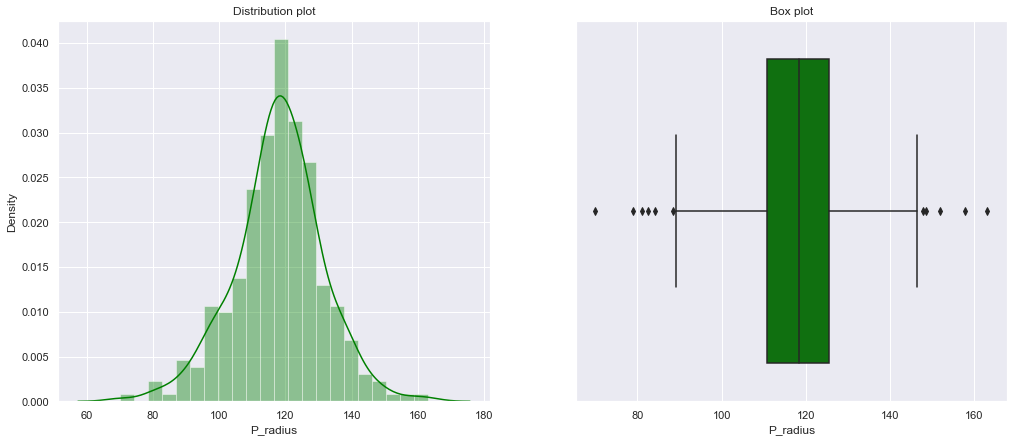

Total Number of Outliers in P_radius =  11.00


In [107]:
# P_radius
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_radius', data=df,  orient='h' , ax=axes[1],color='Green').set_title('Box plot')
sns.distplot(df['P_radius'],  ax=axes[0],color='Green').set_title('Distribution plot')
plt.show()
# Checking Number of outliers
q1, q3= np.percentile(df['P_radius'],[25,75])
IQR = q3-q1
lower,upper = q1-1.5*IQR, q3+1.5*IQR
outliers = ((df['P_radius'] < lower) | (df['P_radius'] > upper)).sum()
print('Total Number of Outliers in P_radius =  %1.2f'%outliers)

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:Darkblue"> P_radius Data is normal distributed with outliers at both ends.Need to Impute outliers.

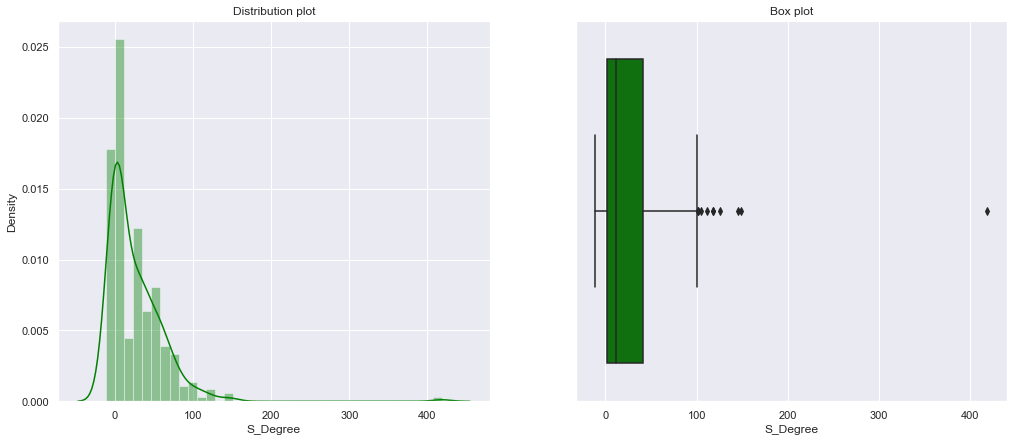

Total Number of Outliers in S_Degree =  10.00


In [108]:
# S_Degree
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'S_Degree', data=df,  orient='h' , ax=axes[1],color='Green').set_title('Box plot')
sns.distplot(df['S_Degree'],  ax=axes[0],color='Green').set_title('Distribution plot')
plt.show()
# Checking Number of outliers
q1, q3= np.percentile(df['S_Degree'],[25,75])
IQR = q3-q1
lower,upper = q1-1.5*IQR, q3+1.5*IQR
outliers = ((df['S_Degree'] < lower) | (df['S_Degree'] > upper)).sum()
print('Total Number of Outliers in S_Degree =  %1.2f'%outliers)

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:Darkblue"> S_Degree Data is right skewed with ten outliers.Need to Impute outliers.

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:Black">Distribution of Target Variable

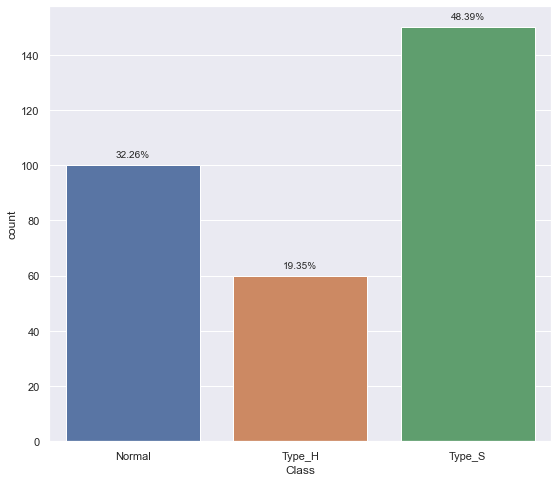

In [109]:
fig, ax = plt.subplots(figsize=(20,8))
width = len(df['Class'].unique())+6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = df, x= 'Class') 



for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(df)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:Darkblue">Type_s distribution is 48.4% followed by Normal(32.3%) and Type_H (19.4%)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Bivariate Analysis

**Class vs P_incidence**

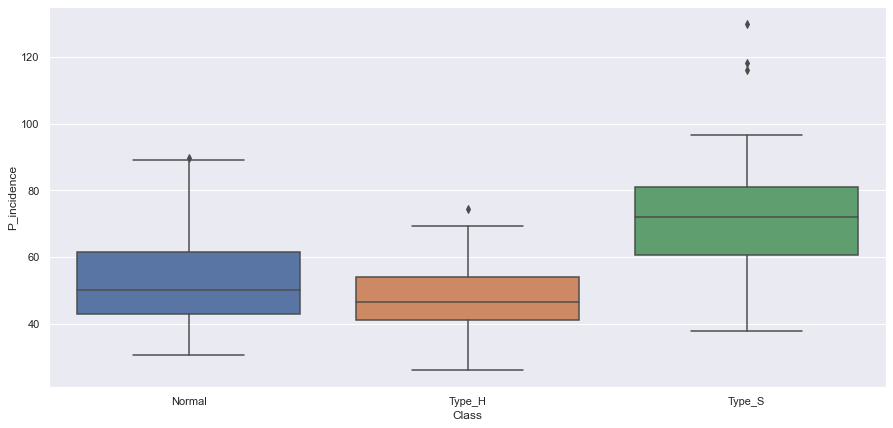

In [110]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='P_incidence', data= df)
plt.show()

> **P_Incidence Value is larger for Type_S Class**

> **Normal Value is slightly higher than Type_H**

**Class vs P_tilt**

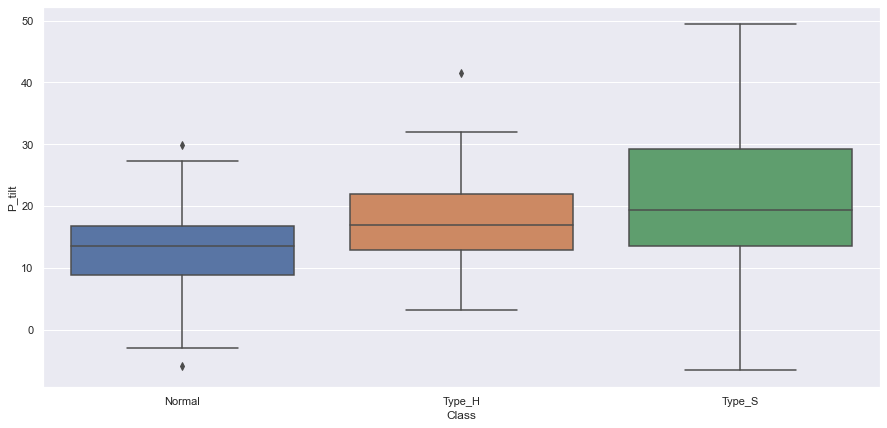

In [111]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='P_tilt', data= df)
plt.show()

> **Mean of Type_S is slightly higher than rest two**

> **Few cases Normal and Type_H also has huge values**

**Class vs L_angle**

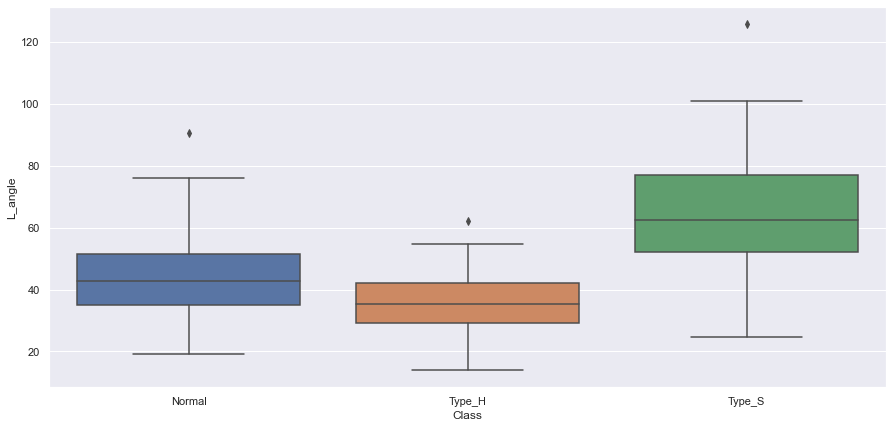

In [112]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='L_angle', data= df)
plt.show()

> **L_Angle has higher value for Type_S Class**

>**We can see Normal class has higher values compared to type_H class**

> **Each class contains one outlier**

**Class vs S_slope**

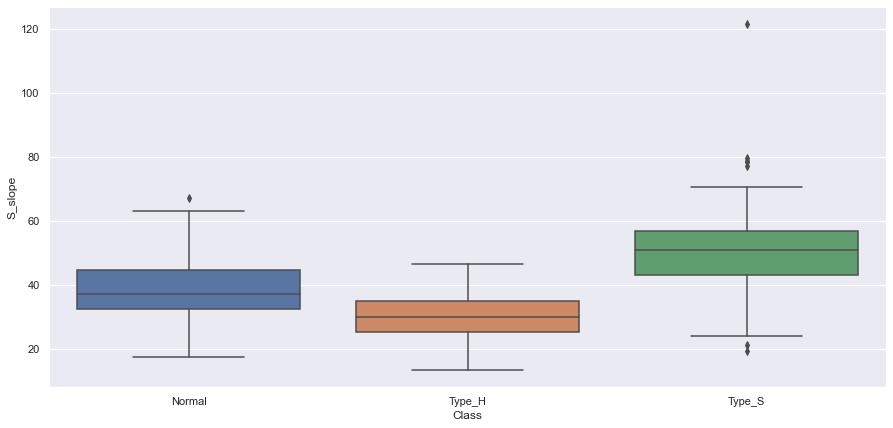

In [113]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='S_slope', data= df)
plt.show()

> **S_slope has huge values for Type_S class**

>**Normal class has high s_slope compared to Type_H**

**Class vs P_radius**

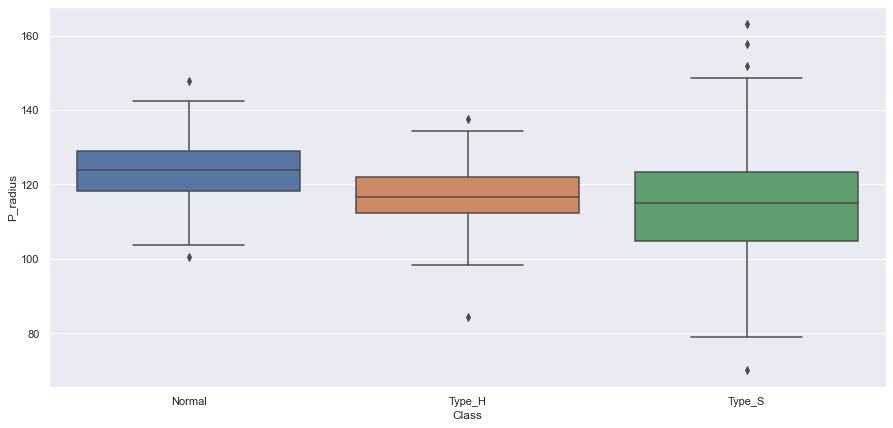

In [114]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='P_radius', data= df)
plt.show()

> **We can see P_radius value is more for Normal Class**

> **There is some extreme values for Type_s class**

> **All classes has higher and lower Value**

**Class vs S_Degree**

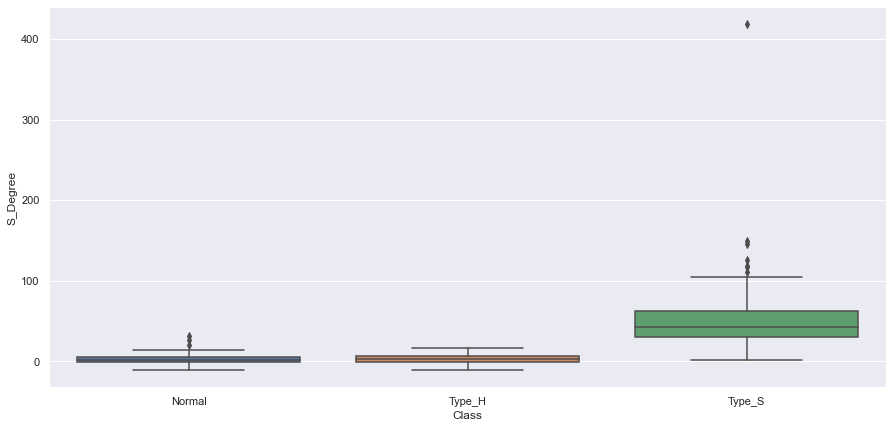

In [115]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='S_Degree', data= df)
plt.show()

> **S_Degree has extreme values for type_S Class**

>**Few Normal class also has huge values for S_Degree**

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Multi-variate Analysis

In [116]:
df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

**Pair Plot of independent Variables**

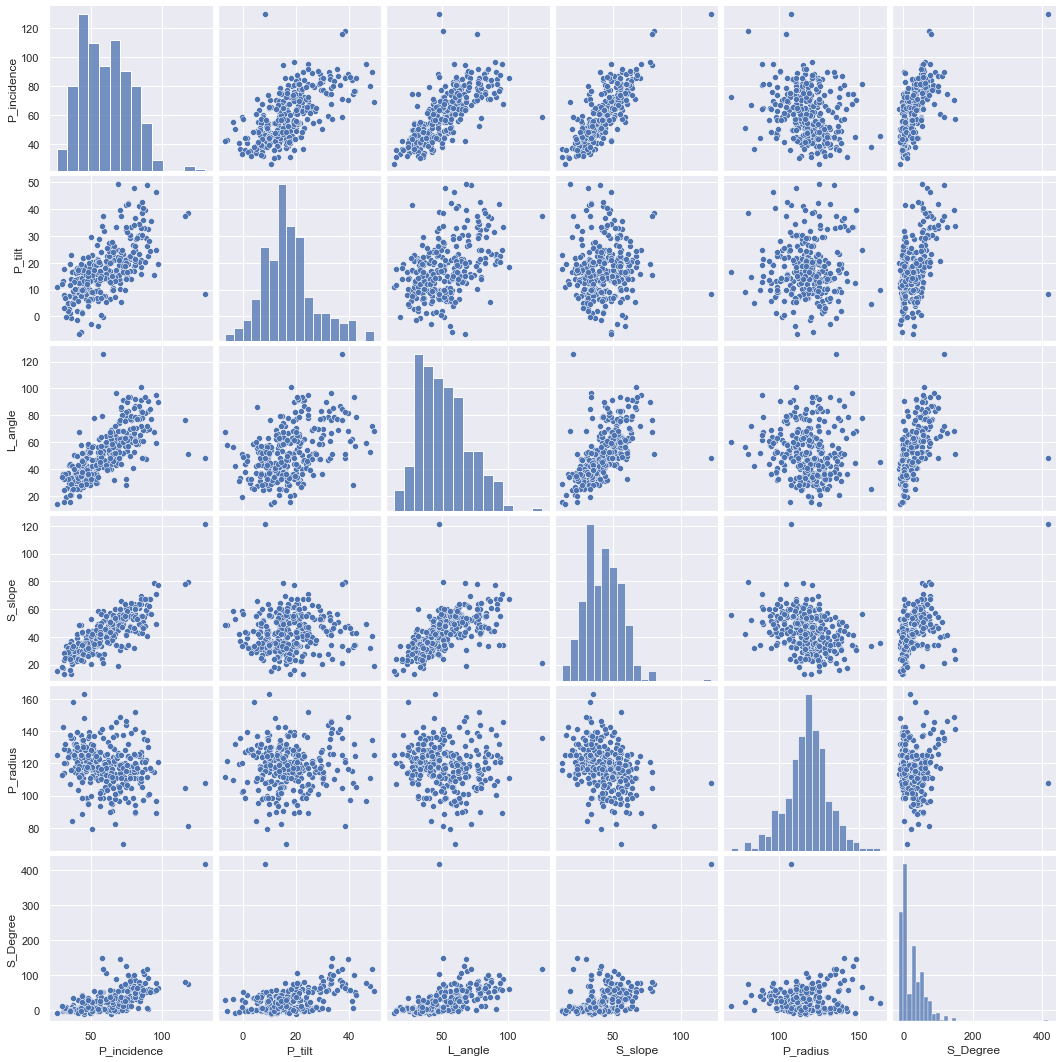

In [117]:
sns.pairplot(df)
plt.show()

> **Along the diagonal we can see the distribution of individual variable**

> **P_incidence has  postive realtionship with all variables except P_radius. Relationship is higher for S_slope and L_angle**

> **P_tilt has Higher Relationship with P_incidence and L_angle.There is no Relationship with s_slope and p_radius**

> **L_angle has postive Relationship with p_tilt,s_slope and s_degree. It has no Relationship with P_radius**

> **s_slope has positive Relationship with L_angle and s_degree**

> **p_radius has no Relationship with s_degree,p_tilt,l_angle.**

> **S_degree has no strong positive Relationship with any of the variables.**

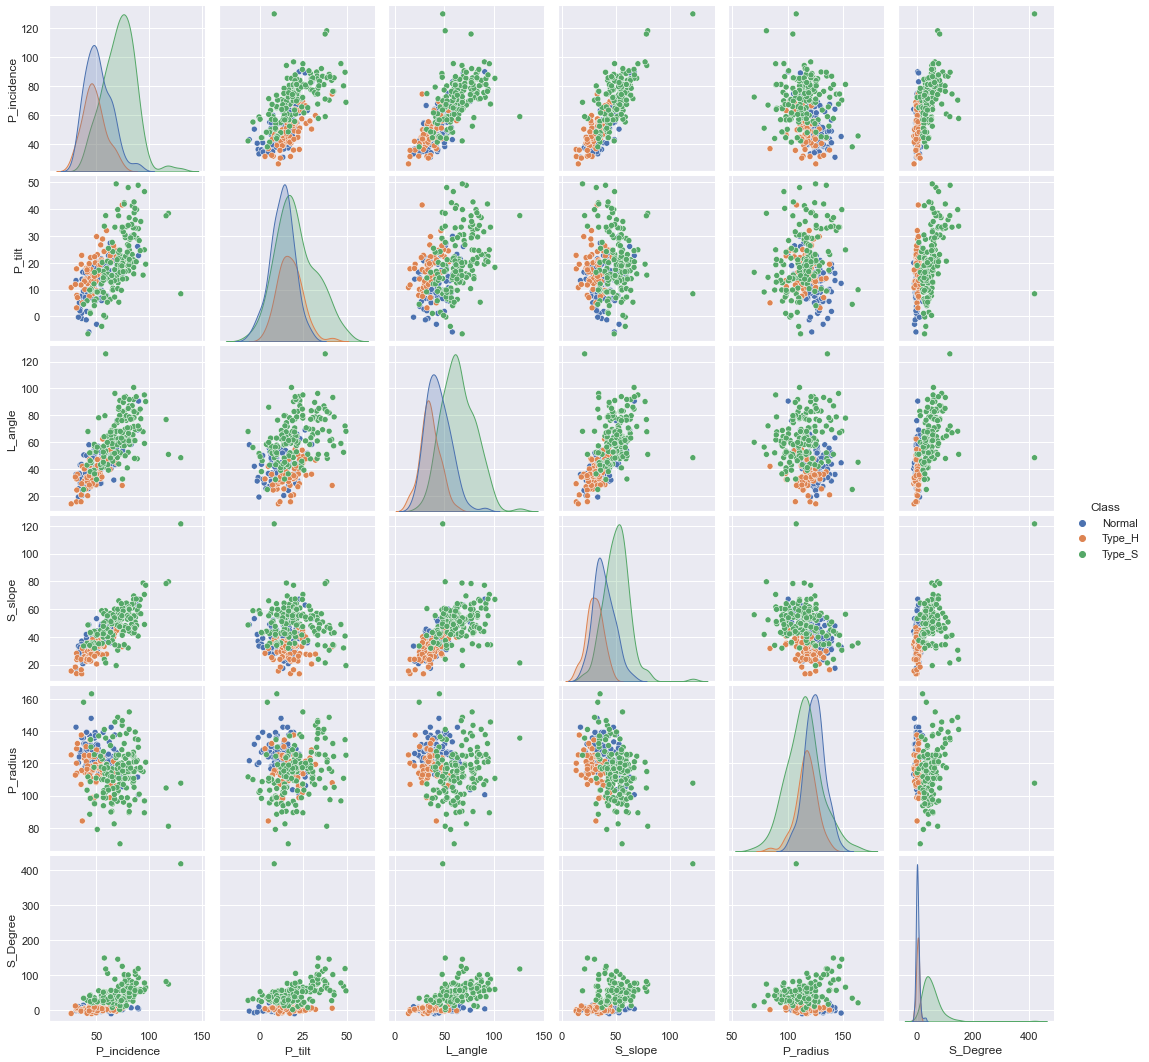

In [118]:
sns.pairplot(df,hue='Class')

> **Along the diagonal we can see distribution of variable for three claases are not same.We can prove that statistically as well**

> **It is evident that type_s class is more compared to other two**

> **Normal class has higher values compared to Type_H**

In [119]:
class_summary=df.groupby('Class') #getting mean values of each class for all independent variables
class_summary.mean().reset_index()

,Class,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,Normal,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
1,Type_H,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
2,Type_S,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


**It is clear that s_Degree of Type_S contains larger values.**

**Each variable as different mean for each class type.**

In [120]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats

<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#00b3e5;"> Hypothesis Testing

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:darkblue">Does each variable has significant effect on class type?
 
**we are using One way ANOVA statistical test**
    
 Explanation : The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups. 

In [121]:
col=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for i in col:
    #print('{} Ho:{} variable has no significant effect on target class type'.format('\033[1m',i))
    #print('\n')
    #print('{} H1: {} variable has significant effect on target class type'.format('\033[1m',i))
    print(i)
    df_normal=df[df.Class=='Normal'][i]
    df_typeH=df[df.Class=='Type_H'][i]
    df_typeS=df[df.Class=='Type_S'][i]
    f_stats,p_value=stats.f_oneway(df_normal,df_typeH,df_typeS)
    print('{} F_stats: {}'.format('\033[92m',f_stats))
    print('{} p_value: {}'.format('\033[92m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.{} variable has significant effect on target class type'.format('\033[92m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.{} variable has no significant effect on target class type'.format('\033[92m',i))
    print('\n')

P_incidence
 F_stats: 98.53970917437489
 p_value: 8.752848964938295e-34
 Rejecting Null Hypothesis.P_incidence variable has significant effect on target class type


P_tilt
 F_stats: 21.29919432898912
 p_value: 2.176879152985521e-09
 Rejecting Null Hypothesis.P_tilt variable has significant effect on target class type


L_angle
 F_stats: 114.98284047330316
 p_value: 5.357329394004833e-38
 Rejecting Null Hypothesis.L_angle variable has significant effect on target class type


S_slope
 F_stats: 89.64395329777525
 p_value: 2.1756703649835103e-31
 Rejecting Null Hypothesis.S_slope variable has significant effect on target class type


P_radius
 F_stats: 16.86693475538487
 p_value: 1.1219959042394205e-07
 Rejecting Null Hypothesis.P_radius variable has significant effect on target class type


S_Degree
 F_stats: 119.12288060759803
 p_value: 5.1147320770401214e-39
 Rejecting Null Hypothesis.S_Degree variable has significant effect on target class type




<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:darkblue">Now we can confirm that each variable have significant effect on class type, it means for each attribute there is satististical differences between means of class type.

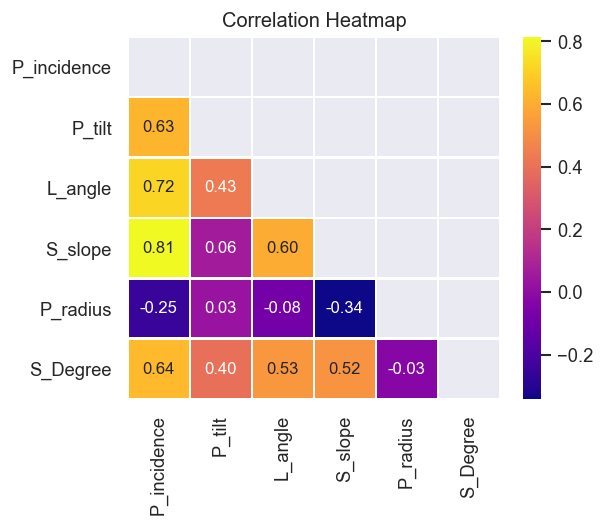

In [122]:
# Checking Correlation Heatmap
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

**we can observe that,**

**P_Incidence is highly positive correlation with all other attributes except P_radius.**

**Explanation :**
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:Black">Patients with condition P_Incidence have more scope of having four more conditions (P_tilt, L_angle, S_slope and S-degree).
P_Radius having negative correlation with P_Incidence. As condition P_incidence increases P_radius will decreases. 

**P_Radius is least or negative correlarated with all other attributes.**


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">4.Data Preprocessing

**Imputing outliers with median**

In [123]:
col=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for c in col:
    median = df[c].median()
    print('{} median of {} is : {}'.format('\033[92m',c, median))
    q25,q75 = np.percentile(df[c], [25,75])
    IQR = q75-q25
    lower,upper = q25-1.5*IQR, q75+1.5*IQR
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[92m',c,len(Outliers)))
    print('\n')
    df[c] = np.where(df[c] > upper, median, df[c])
    df[c] = np.where(df[c] < lower, median, df[c])
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[92m',c,len(Outliers)))  
    print('\n')

 median of P_incidence is : 58.691038135
 Total Number of outliers in P_incidence Before Imputing : 3


 Total Number of outliers in P_incidence After Imputing : 0


 median of P_tilt is : 16.35768863
 Total Number of outliers in P_tilt Before Imputing : 13


 Total Number of outliers in P_tilt After Imputing : 0


 median of L_angle is : 49.56239828
 Total Number of outliers in L_angle Before Imputing : 1


 Total Number of outliers in L_angle After Imputing : 0


 median of S_slope is : 42.404912075
 Total Number of outliers in S_slope Before Imputing : 1


 Total Number of outliers in S_slope After Imputing : 0


 median of P_radius is : 118.2681783
 Total Number of outliers in P_radius Before Imputing : 11


 Total Number of outliers in P_radius After Imputing : 0


 median of S_Degree is : 11.767933769999999
 Total Number of outliers in S_Degree Before Imputing : 10


 Total Number of outliers in S_Degree After Imputing : 0




 **Encoding Target Variable**

In [124]:
#Use label encoder to convert categorical variables to one-hot encoding (dummy variables)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])
df['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

**Normal: 0**

**Type_H: 1**

**Type_S: 2**

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:darkblue">Checking target Imbalance

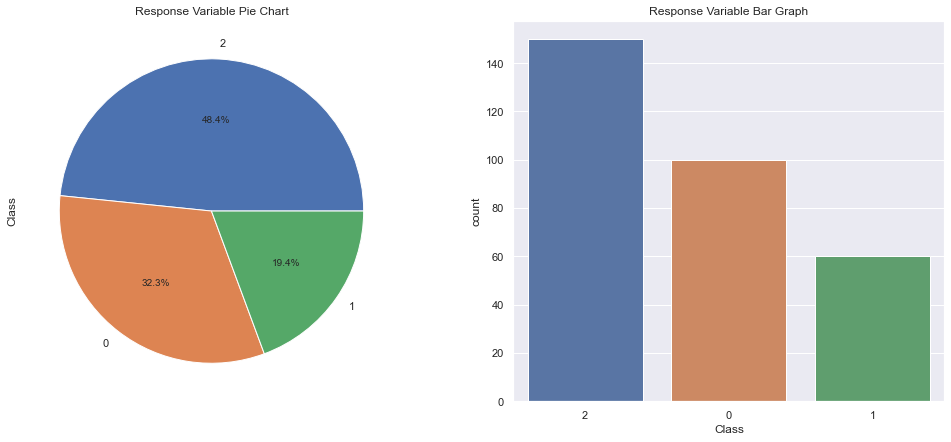

In [125]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['Class'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Class',data=df,ax=axes[1],order=[2,0,1])
axes[0].set_title('Response Variable Pie Chart')
axes[1].set_title('Response Variable Bar Graph')
plt.show()

**We have imbalanced target variable**

**Every class is not equally distributed.**

**48% of data is occupied by Type_S**

**When you have imbalance dataset,model does not learn about less distributed classes. This gives
poor performance in unseen data**.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:darkblue"> Test-Train Split

In [126]:
# Arrange data into independent variables and dependent variables
X=df.drop(columns='Class')
y=df['Class'] #target

In [127]:
X.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,59.890753,16.563518,51.685188,42.698913,118.070758,21.863449
std,16.140170,8.403425,18.071507,12.656430,11.342235,25.298359
min,26.147921,-5.845994,14.000000,13.366931,89.307547,-11.058179
25%,46.430294,10.705427,37.000000,33.347122,111.295804,1.603727
50%,58.645283,16.357689,49.455830,42.389253,118.268178,11.615579
75%,72.313279,21.021167,62.964777,52.475365,125.196027,38.144544
max,96.657315,38.750670,100.744220,79.695154,146.466001,100.292107


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:darkblue"> Scaling Independent attributes
    
    Since we are using distance calculcation, it is important to scale the attributes to make them comaparable one another. so we will use z score to scale the model as we dont know what units were used. 

In [128]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [129]:
X_Scaled=X.apply(zscore)
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,9.956194e-17,1.001617,-2.093992,-0.835321,-0.077291,0.770910,2.281637
P_tilt,310.0,2.115803e-16,1.001617,-2.671023,-0.698235,-0.024533,0.531314,2.644520
L_angle,310.0,-3.491830e-16,1.001617,-2.088709,-0.813929,-0.123563,0.625173,2.719106
S_slope,310.0,-1.156781e-16,1.001617,-2.321303,-0.740091,-0.024506,0.773698,2.927844
P_radius,310.0,-2.607233e-16,1.001617,-2.540039,-0.598287,0.017434,0.629223,2.507544
S_Degree,310.0,2.309980e-17,1.001617,-1.303439,-0.802126,-0.405735,0.644604,3.105160


> **We have scaled independent variables to corresponding z-score.**

> **We can see Mean becomes close to zero and Standard Deviation becomes 1**

In [130]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">5.Model training, testing and tuning:

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:darkblue">KNN Classifier

**Basic Model**

In [131]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' ) #Building knn with 5 neighbors

In [132]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

**Classification Accuracy**

In [133]:
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.8940092165898618
Accuracy on Test data: 0.7526881720430108


> **Training Acuracy is 0.89 and Testing Accuracy is 0.77. Performance is less in test data.**

> **This is due to overfitting of data**

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:darkblue">Confusion Matrix : 
    
It is used to evaluate the performance of classification model. The matrix compares the actual target values with those predicted by the machine learning model

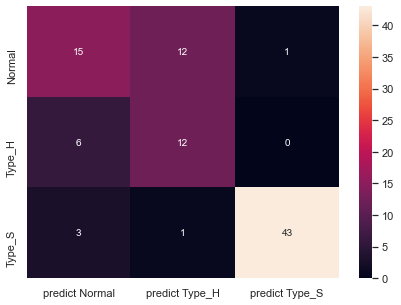

In [134]:
cm = confusion_matrix(y_test, predicted_labels, labels=[0, 1,2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["predict Normal","predict Type_H","predict Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

> **Our model predicts Type_S correctly most of the time. Only three misclassification on this class**

> **Misclassification of labels are more when predicting normal class**

> **Model predicted 16 positive Normals , remaining 12 it falsely predicted as Type_H.**

> **Model predicted 12 positive Type_H , remaining 6 it falsely predicted as Normals.**

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:darkblue">Classification report

In [135]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.62      0.54      0.58        28
           1       0.48      0.67      0.56        18
           2       0.98      0.91      0.95        47

    accuracy                           0.75        93
   macro avg       0.69      0.71      0.69        93
weighted avg       0.77      0.75      0.76        93



**Precesion : It will tell us how many predicted cases are actually turned out to be positive.**
    Precision = TP/(TP + FP)
    
Normals = 70%
Type_H = 46% (Positive prediction for Type_H is less than 50%)
Type_S = 100%  (means there are no False positive or Type 1 error for Type_S)

**Recall : It will tell us how many actual positive cases are predicted correctly with our model.**
  Recall = TP/(TP+FN)
  Normals = 57%
Type_H = 67% 
Type_S = 94%

**F1-score: It combines precision and recall into a single measure.**
F1 score we can say that precison and recall is balanced for class 0 by 63% and for class 1 by 55 % and max for class 2. 


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:darkblue">Finding Best K Value
    
Choosing the right k is not easy and is subjective. Usually choose as an odd number is choosen.
    
A small k captures too much training noise and hence does not do well in test data. A very large k does so much smoothening that it does not manage to capture information in the training data sufficiently - and hence does not do well in test data.
    
If the number of classes is 2, many suggest a rule of thumb approach(set k=sqrt(n)), that might not be the best but does well mostly.¶

In [136]:
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))

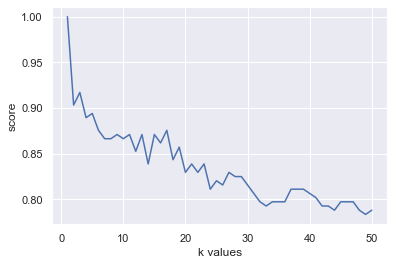

In [137]:
plt.plot(range(1,51),train_score)
plt.xlabel("k values")
plt.ylabel("score")
plt.show()

Training Accuracy decreases with increase in K Value

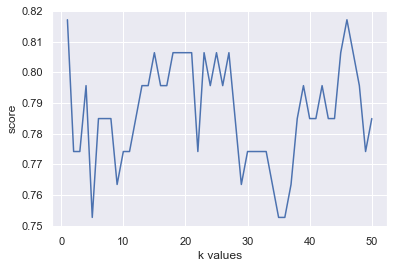

In [138]:
plt.plot(range(1,51),test_score)
plt.xlabel("k values")
plt.ylabel("score")
plt.show()

> **The maximum accuracy occures when k is less than 20.**

> **We will fix k value as less than 20.**

In [139]:
k=[1,3,5,7,9,11,13,15,17,19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.8172043010752689:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69        28
           1       0.58      0.78      0.67        18
           2       0.98      0.94      0.96        47

    accuracy                           0.82        93
   macro avg       0.77      0.79      0.77        93
weighted avg       0.83      0.82      0.82        93

Accuracy on Training data for k 3 is 0.9170506912442397:
Accuracy on Test data for k 3 is 0.7741935483870968:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62        28
           1       0.54      0.78      0.64        18
           2       0.98      0.89      0.93        47

    accuracy                           0.77        93
   macro avg       0.73      0.75      0.73        93
weighted avg       0.80      0.77     

**For K=13 we have very near balanced train and test error**

Accuracy on Training data for k 13 is 0.87

Accuracy on Test data for k 13 is 0.80

Even f1-score for all three classes are better.

**we can use k value as 13 because when we increase this value the precision becomes100% for class 2**

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:darkblue">K-Fold CV for finding best model

In [140]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
GN_model=GaussianNB()
svc_model_linear = SVC(kernel='linear',C=1,gamma=.6)
svc_model_rbf = SVC(kernel='rbf',degree=2,C=.009)
svc_model_poly  = SVC(kernel='poly',degree=2,gamma=0.1,C=.01)

 Accuracy of LR: with mean 0.800000 & Stdev (0.068884)
 Accuracy of KNN: with mean 0.822581 & Stdev (0.061629)
 Accuracy of NB: with mean 0.803226 & Stdev (0.039376)
 Accuracy of SVM-linear: with mean 0.829032 & Stdev (0.076405)
 Accuracy of SVM-poly: with mean 0.809677 & Stdev (0.065238)
 Accuracy of SVM-rbf: with mean 0.483871 & Stdev (0.070674)


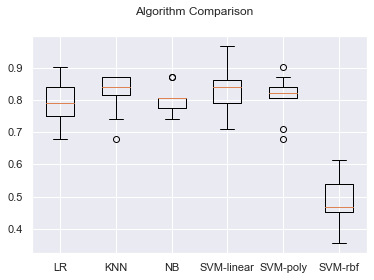

In [141]:
seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = " Accuracy of %s: with mean %f & Stdev (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Accuracy is more for KNN,NB and svm-linear. However the standard deviation is less for NB model.**

**But we can observe some outliers for KNN, NB and SVM-poly.**

**We can observe LR with almost good Accuracy, no outliers and normal distribution.**

**Overall SVM-Linear is showing highest accuracy mean and good Std deviation.**

**We can consider the SVM Linear best model for this dataset.**

**We will check with scaled values to see whether there is improvement in model**

Scaled Accuracy of LR: with mean 0.851613 & Stdev (0.072419)
Scaled Accuracy of KNN: with mean 0.780645 & Stdev (0.057343)
Scaled Accuracy of NB: with mean 0.803226 & Stdev (0.039376)
Scaled Accuracy of SVM-linear: with mean 0.838710 & Stdev (0.066109)
Scaled Accuracy of SVM-poly: with mean 0.483871 & Stdev (0.070674)
Scaled Accuracy of SVM-rbf: with mean 0.483871 & Stdev (0.070674)


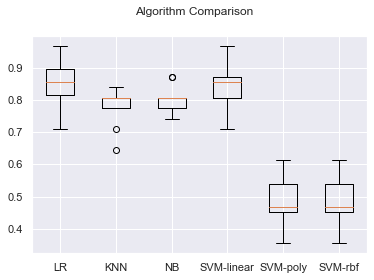

In [142]:
seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model,X_Scaled,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "Scaled Accuracy of %s: with mean %f & Stdev (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**When the scaled values are used instead of normal values Logistic regression is performing well.**

**Logistic Regression gives 85% accuracy with little standard deviation.**

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">6.Conclusion and Improvement

**For Knn, k=13 we are getting balanced train and test error**

**We can use KNN as a final model because of balanced train and test error also the recall and precision values are good**

**Target class is imbalanced. we can improve the precision and recall of Normal, Type_H class if we balance the target class.**

**By using K Fold CV, we got Logistic Regression as best model with 85% Accuracy.**

**As per hypothesis Test, All the variables has significant effect on target class**

**Clear description on each variables may help to understand problem statement better because of medical domain**

##################### ************End of Part One******  #############################

<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#00b3e5;"> Part Two(Domain) : Banking and Finance

CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee 
majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the 
borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an 
average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing 
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit 
with same budget as per last campaign. 

DATA DESCRIPTION: The data consists of the following attributes: 
1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

PROJECT OBJECTIVE: Build an AIML model to perform focused marketing by predicting the potential customers who will 
convert using the historical dataset.

In [143]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [144]:
os.chdir('D:\AIML\GL_Projects\Supervised_Learning')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.Importing datasets

 There are two data sets
    
 Data1.csv
    
 Data2.csv
    

In [145]:
# Dataset 1
df1 = pd.read_csv('Part2 - Data1.csv')
print(f"Shape of Data1 : {df1.shape}")
print(f"Size of Data1 : {df1.size}")
df1.head()

Shape of Data1 : (5000, 8)
Size of Data1 : 40000


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [146]:
# Dataset 2
df2 = pd.read_csv('Part2 -Data2.csv')
print(f"Shape of Data2 : {df2.shape}")
print(f"Size of Data2 : {df2.size}")
df2.head()

Shape of Data2 : (5000, 7)
Size of Data2 : 35000


,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:Black">Merge two data sets

In [147]:
df = pd.merge(df1,df2,how='outer', on='ID')
print(f"Shape of Merged Data : {df.shape}")
print(f"Size of Merged Data : {df.size}")
df.sample(5)

Shape of Merged Data : (5000, 14)
Size of Merged Data : 70000


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
3344,3345,43,19,110,90639,1,3.4,1,0,0,0,0,1,0.0
2858,2859,36,11,158,95054,2,7.8,1,114,0,0,1,1,0.0
428,429,62,38,24,94720,2,1.0,1,116,0,0,0,1,0.0
1393,1394,62,37,55,95039,3,0.9,3,0,0,0,1,0,0.0
2960,2961,55,29,38,90035,4,1.5,3,0,0,0,0,1,0.0


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 2.Data Cleansing

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


**Convert data type**

In [149]:
# Changing the data type of variable into categorical data type as they consist of Binary data.
var= ['Level','HiddenScore','Security','FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard']
df[var] = df[var].astype('category') 

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 347.4 KB


In [151]:
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:Darkblue">Imputing the missing values
    
**LoanOnCard showing 20 missing values. Impute the null with mode value**
   

In [152]:
df['LoanOnCard'].fillna(df['LoanOnCard'].mode()[0], inplace=True)
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0


In [153]:
df.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

**Checking number of unique values in each categorical variable**

In [154]:
for i in var:
    print('{} Number of unique values in {} is {}'.format('\033[92m',i, df[i].unique().value_counts()))

 Number of unique values in Level is 1    1
2    1
3    1
dtype: int64
 Number of unique values in HiddenScore is 4    1
3    1
1    1
2    1
dtype: int64
 Number of unique values in Security is 1    1
0    1
dtype: int64
 Number of unique values in FixedDepositAccount is 0    1
1    1
dtype: int64
 Number of unique values in InternetBanking is 0    1
1    1
dtype: int64
 Number of unique values in CreditCard is 0    1
1    1
dtype: int64
 Number of unique values in LoanOnCard is 0.0    1
1.0    1
dtype: int64


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3.Data analysis & visualisation:

In [155]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0


<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;">Mean and median of 
    
**Age : looks similar**
    
**CustomerSince : Looks similar**
    
**HighestSpend : Looks little right skewed** 
    
**MonthlyAverageSpend : Little right skewed**
    
**Mortgage : Highly right skewed**
   
**we can ignore ID and Zipcode(related to area)**

**We can observe "Customer since" min showing -3, which need to be inspected**

In [156]:
#"Customer since" min showing -3, which is an error
df[df['CustomerSince']<0].shape

(52, 14)

In [157]:
#Taking absolute value of customer since column, to remove negative values
df['CustomerSince']=abs(df['CustomerSince'])
df['CustomerSince'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: CustomerSince, dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Univariate and Bivariate Analysis
    

<AxesSubplot:title={'center':'Mortgage'}, xlabel='Mortgage', ylabel='Density'>

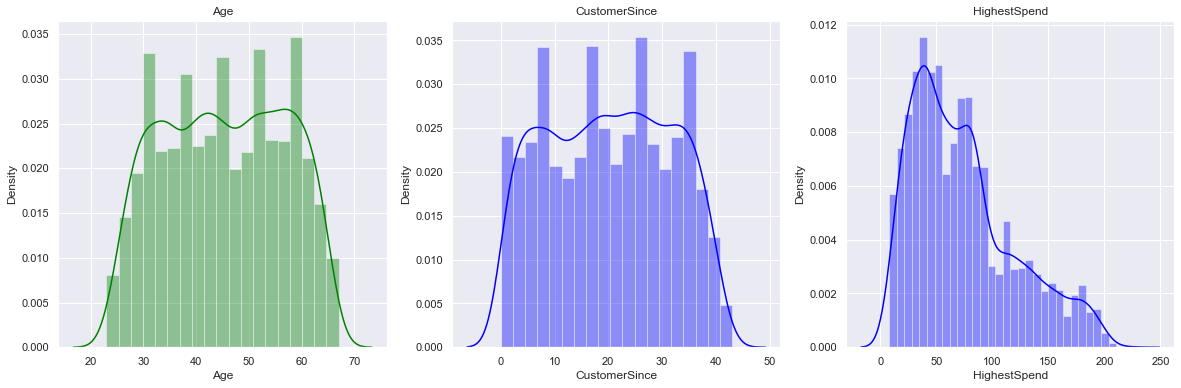

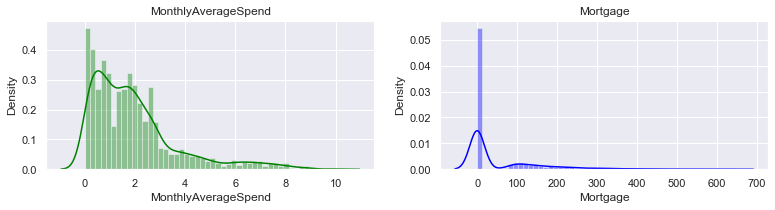

In [158]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Age')
sns.distplot(df['Age'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('CustomerSince')
sns.distplot(df['CustomerSince'],color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('HighestSpend')
sns.distplot(df['HighestSpend'],color='blue')

plt.figure(figsize=(20,6))
plt.subplot(2, 3, 1)
plt.title('MonthlyAverageSpend')
sns.distplot(df['MonthlyAverageSpend'],color='green')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('Mortgage')
sns.distplot(df['Mortgage'],color='blue')


**Age and Customer since looks highly correlated, both are normally distributed.**

**Spendings are more between 0-100.**

**Average spendings are between 0-2**

**We can ignore mortgage column, because most of customer houses are not mortgaged.**
**(It is highly densed at zero)**

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Comparing each categorical variable with respect to LoanOnCard

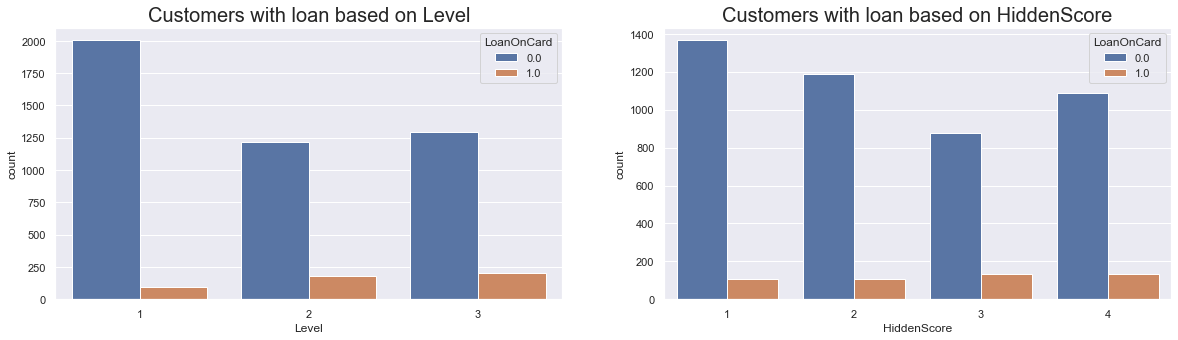

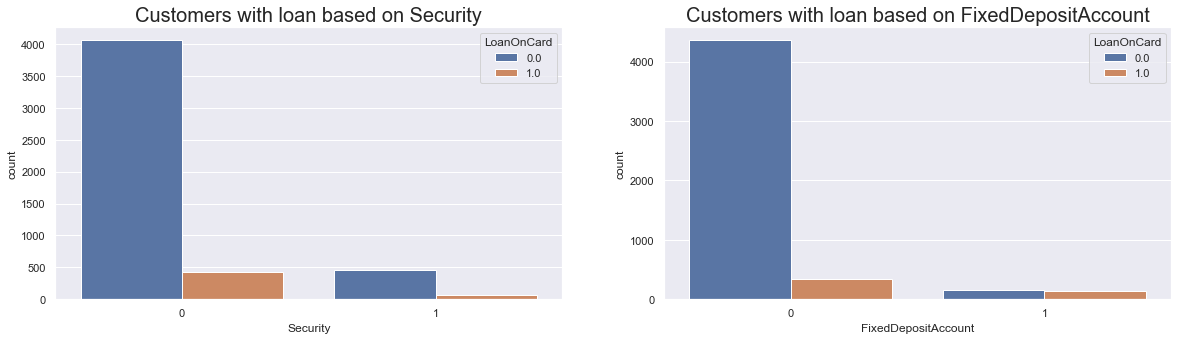

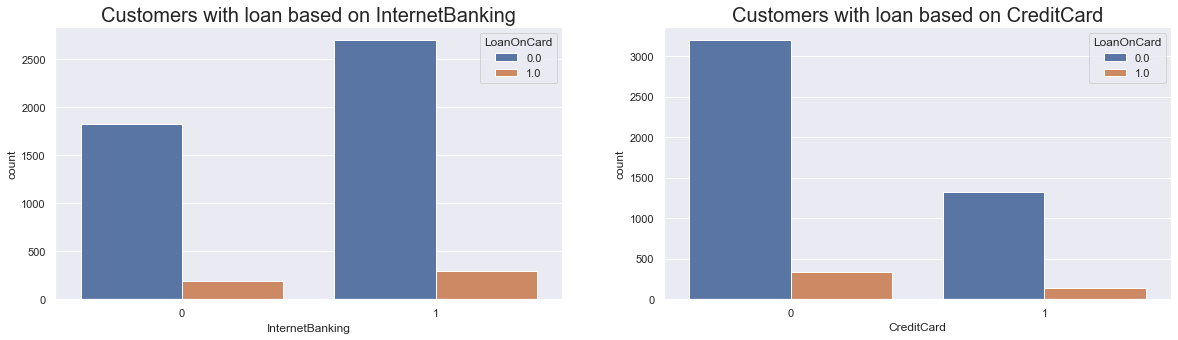

In [159]:
#['Level','HiddenScore','Security','FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard']

#Level

fig, ax = plt.subplots(1, 2)
#sns.set(font_scale=1)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.countplot(x='Level',data=df,hue='LoanOnCard', ax=ax[0])
sns.countplot(x='HiddenScore',data=df,hue='LoanOnCard', ax=ax[1])
ax[0].set_title("Customers with loan based on Level",fontsize=20)
ax[1].set_title('Customers with loan based on HiddenScore',fontsize=20)
plt.show()

fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.countplot(x='Security',data=df,hue='LoanOnCard', ax=ax[0])
sns.countplot(x='FixedDepositAccount',data=df,hue='LoanOnCard', ax=ax[1])
ax[0].set_title("Customers with loan based on Security", fontsize=20)
ax[1].set_title('Customers with loan based on FixedDepositAccount',fontsize=20)
plt.show()

fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.countplot(x='InternetBanking',data=df,hue='LoanOnCard', ax=ax[0])
sns.countplot(x='CreditCard',data=df,hue='LoanOnCard', ax=ax[1])
ax[0].set_title("Customers with loan based on InternetBanking",fontsize=20)
ax[1].set_title('Customers with loan based on CreditCard',fontsize=20)
plt.show()

**1.Observed few customers with loan in each and every variable.**

**2.High chances of finding potential customers.**



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Hypothesis Testing on Categorical variable

**Does each class of variable have equal chances of getting loan.**
    
**Chi square Test** to solve this assumption
    
Reason : It is used for testing relationships between two or more categorical variables.

In [160]:
var = ['Level','HiddenScore','Security','FixedDepositAccount','InternetBanking','CreditCard']
# does each class of variable have equal chances of getting loan
for i in var:
    df_var = pd.pivot_table(data=df,index='LoanOnCard',columns= i,aggfunc='size')
    chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(df_var)
    print("{}Chi statistics of {}".format('\033[92m',i))
    print('{} chi_sq_Stat: {}'.format('\033[92m',chi_sq_Stat))
    print('{} p_value: {}'.format('\033[92m',p_value))
    print('{} deg_freedom: {}'.format('\033[92m',deg_freedom))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.Each class of {} has no equal chances of getting a loan'.format('\033[92m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.Each class of {} has equal chances of getting a loan'.format('\033[92m',i))
    print('\n')

Chi statistics of Level
 chi_sq_Stat: 111.2398718738913
 p_value: 6.991473868665428e-25
 deg_freedom: 2
 Rejecting Null Hypothesis.Each class of Level has no equal chances of getting a loan


Chi statistics of HiddenScore
 chi_sq_Stat: 29.676116414854746
 p_value: 1.6144121228248757e-06
 deg_freedom: 3
 Rejecting Null Hypothesis.Each class of HiddenScore has no equal chances of getting a loan


Chi statistics of Security
 chi_sq_Stat: 2.172310545186504
 p_value: 0.14051497326319357
 deg_freedom: 1
 Fail to Reject Null Hypothesis.Each class of Security has equal chances of getting a loan


Chi statistics of FixedDepositAccount
 chi_sq_Stat: 495.90424218782334
 p_value: 7.398297503329848e-110
 deg_freedom: 1
 Rejecting Null Hypothesis.Each class of FixedDepositAccount has no equal chances of getting a loan


Chi statistics of InternetBanking
 chi_sq_Stat: 0.1560067212052492
 p_value: 0.6928599643141485
 deg_freedom: 1
 Fail to Reject Null Hypothesis.Each class of InternetBanking has equa

**We can conclude that Each class of Customers with  variables securities/InternetBanking/CreditCard have equal chances of getting Loan**

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Comparing each Numerical variable with respect to LoanOnCard

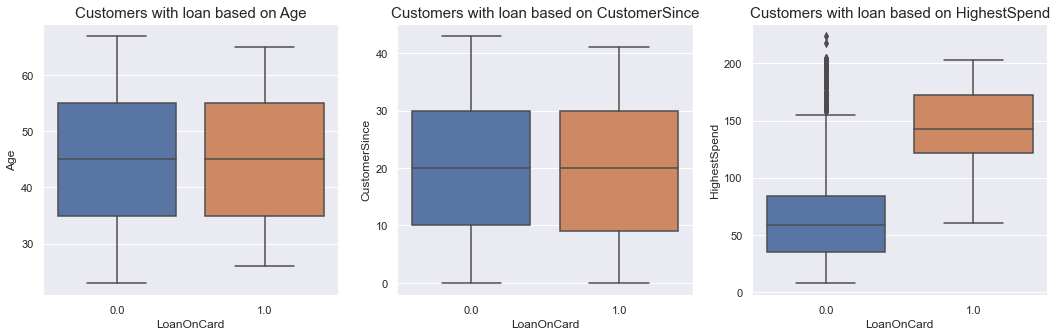

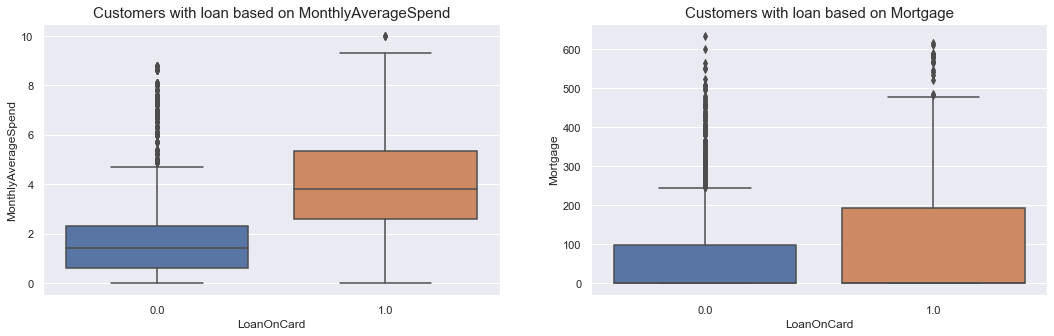

In [161]:
fig, ax = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(18)
sns.boxplot(x='LoanOnCard', y ='Age', data=df, ax=ax[0])
sns.boxplot(x='LoanOnCard', y ='CustomerSince', data= df, ax=ax[1])
sns.boxplot(x='LoanOnCard', y='HighestSpend',data=df, ax=ax[2])
ax[0].set_title("Customers with loan based on Age",fontsize=15)
ax[1].set_title('Customers with loan based on CustomerSince',fontsize=15)
ax[2].set_title('Customers with loan based on HighestSpend',fontsize=15)
plt.show()

fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(18)
sns.boxplot(x='LoanOnCard', y ='MonthlyAverageSpend', data=df, ax=ax[0])
sns.boxplot(x='LoanOnCard', y ='Mortgage', data= df, ax=ax[1])
ax[0].set_title("Customers with loan based on MonthlyAverageSpend",fontsize=15)
ax[1].set_title('Customers with loan based on Mortgage',fontsize=15)
plt.show()

**1.Distribution of with or without loan is almost similar with customers having Age in the range 35-55.**

**2.Distribution of with or without loan is almost similar with customers since in the range 10-30.**

**3.Those who availed loan tend to have highest spending.**

**4.MonthlyAverage spend of customer is high with those availed loans.**

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Hypothesis Testing on Numerical variable

**Does Numerical Variables have equal means among customers with Loan status=Yes and those whose loan status = No**

 
Since we want to compare the difference in means of the samples, we can either use 2 sample t test or z-test.
    
Since our sample size is reasonably big ( >30 samples), we will go ahead with the aforementioned tests.

In [162]:
from statsmodels.stats.weightstats import ztest
var1 = ['Age', 'CustomerSince','HighestSpend', 'MonthlyAverageSpend']
for j in var1:
    sample1 = df.loc[df.LoanOnCard == 0, j]
    sample2 = df.loc[df.LoanOnCard == 1, j]

    alpha = 0.05   # Let's consider a significance level of 5%

    test_statistic, p_value = ztest(sample1, sample2)
    print("{} Z Test of {}".format('\033[92m',j))
    print('{} p_value: {}'.format('\033[92m',p_value))
    if p_value <= alpha:
        print('{} Rejecting Null Hypothesis. {} has no equal means for Loan status yes or no'.format('\033[92m',j))
    else:
        print('{} Fail to Reject Null Hypothesis.{} has equal means for Loan status yes or no'.format('\033[92m',j))
    print('\n')

 Z Test of Age
 p_value: 0.5849348846470401
 Fail to Reject Null Hypothesis.Age has equal means for Loan status yes or no


 Z Test of CustomerSince
 p_value: 0.557153062313129
 Fail to Reject Null Hypothesis.CustomerSince has equal means for Loan status yes or no


 Z Test of HighestSpend
 p_value: 0.0
 Rejecting Null Hypothesis. HighestSpend has no equal means for Loan status yes or no


 Z Test of MonthlyAverageSpend
 p_value: 4.395090072761741e-171
 Rejecting Null Hypothesis. MonthlyAverageSpend has no equal means for Loan status yes or no




In [163]:
df=df.drop(['ID', 'ZipCode'], axis=1)

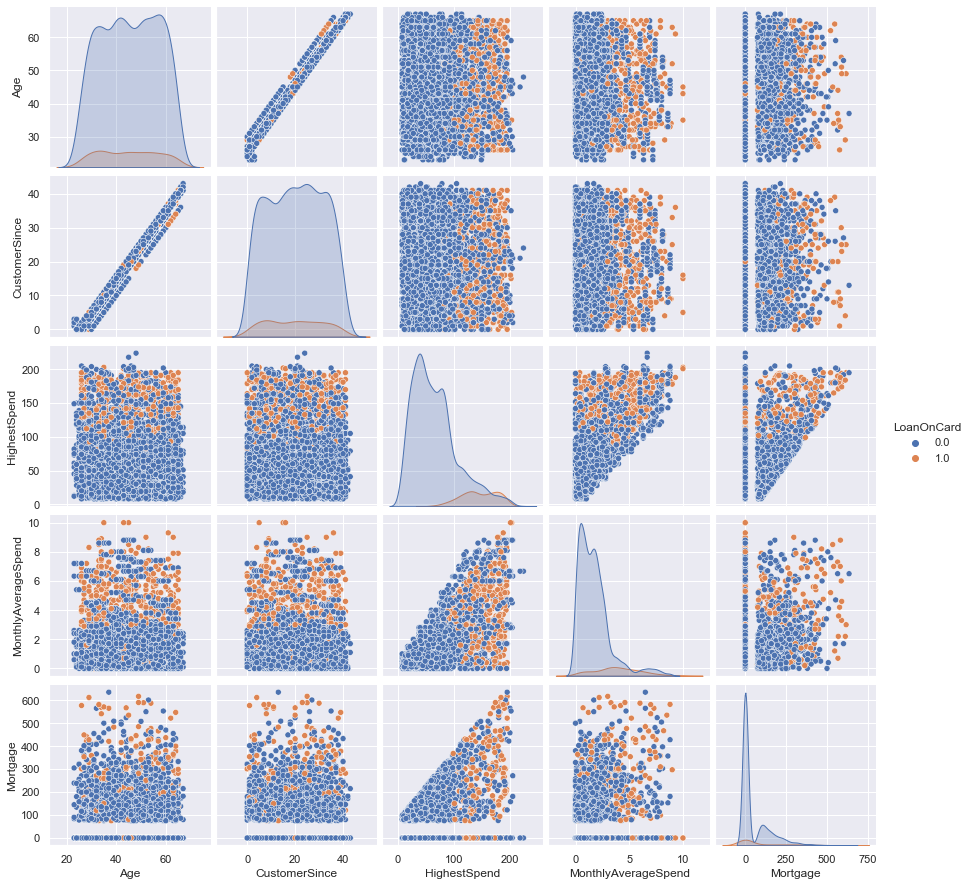

In [164]:
dfd= df.drop(['Level','HiddenScore','Security','FixedDepositAccount','InternetBanking','CreditCard'],axis=1)
sns.pairplot(dfd,diag_kind='kde',hue='LoanOnCard')

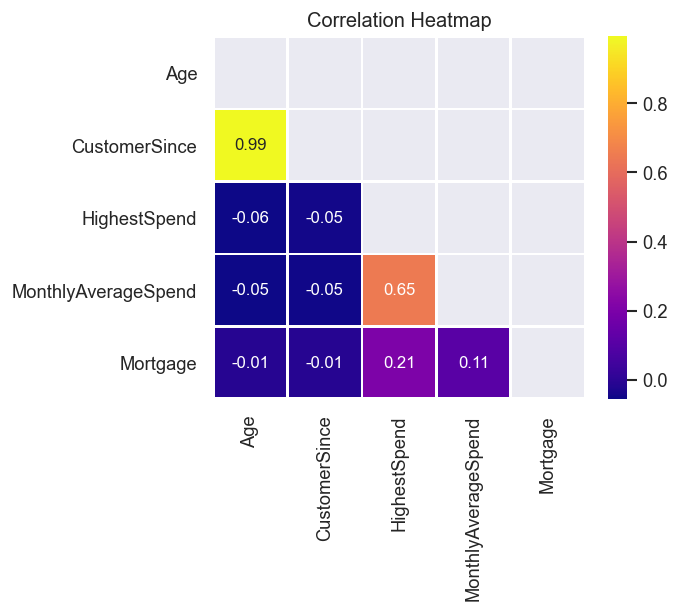

In [165]:
# Checking Correlation Heatmap
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

**Highestspend and MonthlyAverageSpend is showing 65% correlation.**

**Age and CustomerSince is highly positive correlated.**

We could see that Age & CustomerSince are very strongly correlated, Hence it is fine for us to go with Age and drop CustomerSince to avoid multi-colinearity issue.

In [166]:
df=df.drop(['CustomerSince'],axis=1)

In [167]:
var1 = ['Level','HiddenScore','Security','FixedDepositAccount','InternetBanking','CreditCard']
# Lets convert above categorical variable back to numeric type Int64 to split the data into training and test set.
df[var1] = df[var1].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  5000 non-null   int64   
 1   HighestSpend         5000 non-null   int64   
 2   HiddenScore          5000 non-null   int64   
 3   MonthlyAverageSpend  5000 non-null   float64 
 4   Level                5000 non-null   int64   
 5   Mortgage             5000 non-null   int64   
 6   Security             5000 non-null   int64   
 7   FixedDepositAccount  5000 non-null   int64   
 8   InternetBanking      5000 non-null   int64   
 9   CreditCard           5000 non-null   int64   
 10  LoanOnCard           5000 non-null   category
dtypes: category(1), float64(1), int64(9)
memory usage: 594.7 KB


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">4.Data pre-processing

**In this problem our variable of interest (Dependent Variable) is LoanonCard column. With all other attributes we have for a customer, we should build our model to make predictions for the bank to drive their stratergy to maximise customers who could avail loan.**

In [168]:
print(df['LoanOnCard'].value_counts())

0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64


Overall percentage of customers who have availed Loan:9.6 %   (480/5000)*100

**Imbalance in dataset:**

As we could see, our Target variable is not equally distributed, only 9.6% of customers have availed Loan. So, if our model is going to learn from this dataset and do the prediction chances are there that it might be biased towards the Majority class (In this case , loan not being availed by the customer) and ignore the minority class. Hence , we should try to balance our dataset to make our model learn and predict with being biased and treat both classes equally for better result.

**Balancing the Target Variable**

There are couple of ways to achieve this and this technique is called resampling, Resampling is of two types

Up-sample Minority Class
Down-sample Majority Class
Resample from skilearn is our solution.

For this problem Upsampling seemed to work better.

Note: I did try down sampling by using resample(df_minority,replace=False) but it did not have any impact on Precision and recall scores for any models , But Up sampling had phenomenol impact on these metrics(Precision, Recall, F1 score).

Furtherore, Upsampling allows us to retain the information infact we add more information to the dataset, wheras downsampling does not gives us this privilage. Hence, in most cases it is better to go for upsampling.

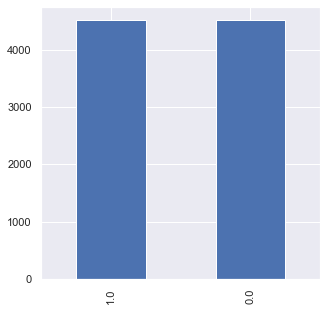

In [169]:
from  sklearn.utils import resample
df_majority=df[df['LoanOnCard']==0]
df_minority=df[df['LoanOnCard']==1]
df_upsample_minority=resample(df_minority,replace=True,random_state=12,n_samples=4520)
df_upsample=pd.concat([df_majority,df_upsample_minority])
count=df_upsample['LoanOnCard'].value_counts()
count.plot(kind='bar',figsize=(5,5));

In [170]:
df_upsample.shape

(9040, 11)

**Standardization (Scaling) for  Imbalanced data**

In [171]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df1=scaler.fit_transform(df.drop('LoanOnCard',axis=1))

In [172]:
scaled_df1=pd.DataFrame(scaled_df1)
scaled_df1.columns=df_upsample.drop('LoanOnCard',axis=1).columns
scaled_df1.head(1)

,Age,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,-1.774417,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314


**Split our data into dependent variable and Independent variable for imbalanced data**

In [173]:
X =df.drop(['LoanOnCard'],axis=1)
Y =df['LoanOnCard']

**Training Data=70%, Test Data=30%**

IM = Imbalced Data

In [174]:
x_train_IM,x_test_IM,y_train_IM,y_test_IM=train_test_split(X,Y,test_size=0.3,random_state=100)

**Standardization (Scaling) for upsampled Balancing data**

In [175]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df_upsample.drop('LoanOnCard',axis=1))

In [176]:
scaled_df=pd.DataFrame(scaled_df)
scaled_df.columns=df_upsample.drop('LoanOnCard',axis=1).columns
scaled_df.head(1)

,Age,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,-1.764407,-1.056754,1.326415,-0.57499,-1.258862,-0.573212,2.776519,-0.439772,-1.215201,-0.644496


**Split our data into dependent variable and Independent variable after Balancing the Target Variable**

In [177]:
X_upsampled=df_upsample.drop(['LoanOnCard'],axis=1)
Y_upsampled=df_upsample['LoanOnCard']

**Training Data=70%, Test Data=30%**

In [178]:
x_train,x_test,y_train,y_test=train_test_split(X_upsampled,Y_upsampled,test_size=0.3,random_state=100)

In [179]:
model_list=[]
model_f1_score=[]
model_accuracy_score=[]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">5.Model training, testing and tuning:

### LogisticRegression for Imbalaced data

In [180]:
from sklearn.metrics import f1_score

In [181]:
model_list.append('LogisticRegression_IM')
lm_IM=LogisticRegression()

In [182]:
lm_IM.fit(x_train_IM,y_train_IM)

LogisticRegression()

In [183]:
yhat_IM=lm_IM.predict(x_test_IM)

In [184]:
lm_score_IM=f1_score(y_test_IM,yhat_IM)
model_f1_score.append(lm_score_IM)
lm_score_IM

0.664179104477612

In [185]:
lm_accuracy_IM=accuracy_score(y_test_IM,yhat_IM)
model_accuracy_score.append(lm_accuracy_IM)
lm_accuracy_IM

0.94

In [186]:
print(classification_report(y_test_IM,yhat_IM))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1342
         1.0       0.81      0.56      0.66       158

    accuracy                           0.94      1500
   macro avg       0.88      0.77      0.82      1500
weighted avg       0.94      0.94      0.94      1500



**We just done Logistic Regression model on Imbalanced to understand its performance.**

Though we have a very good accuracy score of 94%, We should not consider this score as our data is highly imbalanced. 

For Imbalanced datasets it is wise to look for precision and recall rather than accuracy.We can observe that we have very poor recall and precession values.

Lets continue our data after balancing using Umsampling Technique.

### LogisticRegression for Balanced data

In [187]:
from sklearn.metrics import f1_score

In [188]:
model_list.append('LogisticRegression')
lm=LogisticRegression()

In [189]:
lm.fit(x_train,y_train)

LogisticRegression()

In [190]:
yhat_lm=lm.predict(x_test)

In [191]:
lm_score=f1_score(y_test,yhat_lm)
model_f1_score.append(lm_score)
lm_score

0.8972776769509981

In [192]:
lm_accuracy=accuracy_score(y_test,yhat_lm)
model_accuracy_score.append(lm_accuracy)
lm_accuracy

0.8956489675516224

In [193]:
print(classification_report(y_test,yhat_lm))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      1344
         1.0       0.89      0.90      0.90      1368

    accuracy                           0.90      2712
   macro avg       0.90      0.90      0.90      2712
weighted avg       0.90      0.90      0.90      2712



<AxesSubplot:>

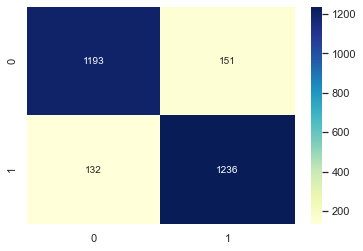

In [194]:
sns.heatmap(confusion_matrix(y_test,yhat_lm),annot=True,fmt='',cmap='YlGnBu')

We can see the upsampled data produced a accouracy score of 90%, with 90% recall and 89% Precision.

# Summary from Logistic Regresison :

1)Recall of 90% infers, Among customers who bought the loan our model predicted 90% to be right.

2)Precison Score of 89% implies among predcited positive how much was actual positive, Among total customers we predicted how much customers actually bought the loan.

3)We should also ensure that the type1 & type 2 errors are minimal in an ideal model.

4)In our Logistic model with Upsampled data, 151 customers were (False postive) predicted to buy the loan.

5)132 were predicted not to buy the loan but they actually bought.

Here type2 error doesn't make a negative impact , as 132 who we predicted will not buy actually bought, this is not going to have much negative impact on the problem.

### Naive Bayes

In [195]:
model_list.append('GaussianNB')
naive = GaussianNB()
naive.fit(x_train,y_train)

GaussianNB()

In [196]:
yhat_naive=naive.predict(x_test)

In [197]:
naive_score=f1_score(y_test,yhat_naive)
model_f1_score.append(naive_score)
naive_score

0.8152766952455182

In [198]:
naive_accuracy=accuracy_score(y_test,yhat_naive)
model_accuracy_score.append(naive_accuracy)
naive_accuracy

0.8252212389380531

In [199]:
print(classification_report(y_test,yhat_naive))

              precision    recall  f1-score   support

         0.0       0.79      0.89      0.83      1344
         1.0       0.87      0.76      0.82      1368

    accuracy                           0.83      2712
   macro avg       0.83      0.83      0.82      2712
weighted avg       0.83      0.83      0.82      2712



<AxesSubplot:>

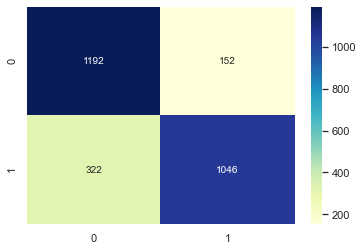

In [200]:
sns.heatmap(confusion_matrix(y_test,yhat_naive),annot=True,fmt='',cmap='YlGnBu')

We can see the upsampled data produced a accouracy score of 83%, with 76% recall and 87% Precision.

# Summary from Naive Bayes :

1)Recall of 76% infers, Among customers who bought the loan our model predicted 76% to be right.

2)Precison Score of 87% implies among predcited positive how much was actual positive, Among total customers we predicted how much customers actually bought the loan.

3)We should also ensure that the type1 & type 2 errors are minimal in an ideal model.

4)In our Naive model with Upsampled data, 152 customers were (False postive) predicted to buy the loan.

5)322 were predicted (False Negative) not to buy the loan but they actually bought.


# Ploting the Results

**F1-Score**

0.8
0.664179104477612
0.8
0.8972776769509981
0.8
0.8152766952455182


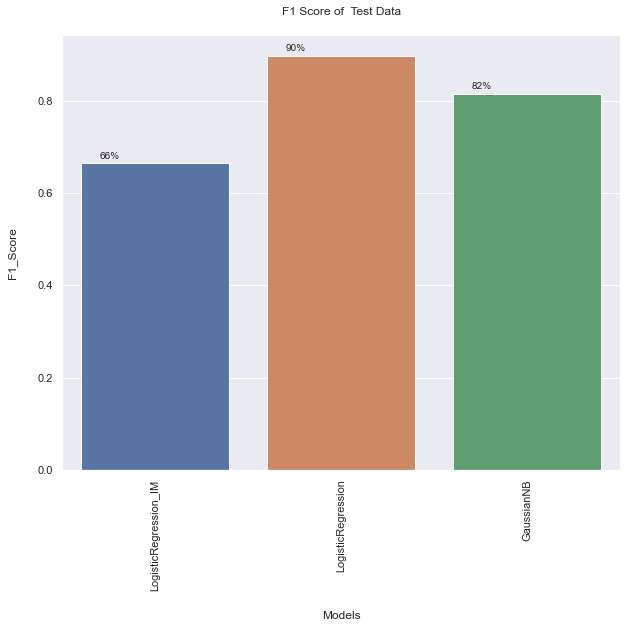

In [201]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(model_list,model_f1_score, estimator = np.max)
ax.set_title("F1 Score of  Test Data",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("F1_Score",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.1, y + height + 0.01))
    print(width)
    print(height)

**F1-score of Logistic Regression showing Better result than Naive Bayes.**

## Model Evaluation :

We can use ROC curve and AUC score to evaluate the model performance. But in terms of  F1-score, Precion and recall we can clearly see Logistic regression model is giving the best result than Naive Bayes.

So no need to check ROC and AUC score.


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Tuning
    
**Find Best Model by tuning the hyperparameters in Logistic regression.**

In [202]:
logModel = LogisticRegression()

In [203]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

**Import Grid Search**

In [204]:
from sklearn.model_selection import GridSearchCV

In [205]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [206]:
best_clf = clf.fit(x_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 604 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 968 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1474 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2096 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 2746 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 3496 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 4346 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 10.8min finished


**Completed 4800 iterations to find the best model.**

In [207]:
best_clf.best_estimator_

LogisticRegression(C=0.08858667904100823, max_iter=1000, penalty='l1',
                   solver='liblinear')

In [208]:
print (f'Accuracy - : {best_clf.score(x_train,y_train):.3f}')

Accuracy - : 0.902


In [209]:
yhat_tuning = best_clf.predict(x_test)

In [210]:
print(classification_report(y_test,yhat_tuning))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      1344
         1.0       0.90      0.89      0.90      1368

    accuracy                           0.90      2712
   macro avg       0.90      0.90      0.90      2712
weighted avg       0.90      0.90      0.90      2712



**After fine tuning the logistic regression model we could see no much improvement in the model.**

**Before fine tune :** 

               precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      1344
         1.0       0.89      0.90      0.90      1368

    accuracy                           0.90      2712
    
**After fine tune :**

               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      1344
         1.0       0.90      0.90      0.90      1368

    accuracy                           0.90      2712
    

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">6.Conclusion and Improvement

**1.Logistic Regression model performs the best than Naive Bayes , evident from above results.**

**2.Model performance is far better when we balanced the target variable.**

**3.Logistic Regression model able to predict 90% potential customers, help to convert them into borrowers.**

**4.Observed no much improvement with tuning hyperparameters.**

**5.We may improve model performance by using other classification algorithms.**

**6.Using hypothesis Testing,we can say Each class of Customers with  variables securities/InternetBanking/CreditCard have equal chances of getting Loan**

**7.We have dropped attribute CustomerSince to avoid Multicollinearity problem, as Age and CustomerSince are higly correlated.**

**8.Data looks pretty good to my knowledge, nothing to improve.**


